<a href="https://colab.research.google.com/github/RishabhMathur06/Synthetic-Data-Generation/blob/main/Synthetic_Data_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wandb
import wandb
import keras
import tensorflow as tf
import numpy as np
from keras import Sequential
from keras.layers import Conv2D, Flatten, Dense # Keras is also a popular machine learning library - it runs on TensorFlow, making it easier to build models.
import matplotlib.pyplot as plt # matplotlib handles graphing
from wandb.keras import WandbCallback

wandb.login()
wandb.init(project="synth-data-youtube", config={"hyper": "parameter"})

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rmworkofficial1 (infinityboys). Use `wandb login --relogin` to force relogin


wandb: 
wandb: Plotting SVC.
wandb: WARNING could not find any of attributes feature_importances_, feature_log_prob_, coef_ on classifier. Cannot plot feature importances.
wandb: Logged feature importances.
wandb: Logged confusion matrix.
wandb: Logged summary metrics.
wandb: Logged class proportions.
wandb: Logged calibration curve.
wandb: WARNING wandb.plots.* functions are deprecated and will be removed in a future release. Please use wandb.plot.* instead.
wandb: Logged roc curve.
wandb: Logged precision-recall curve.


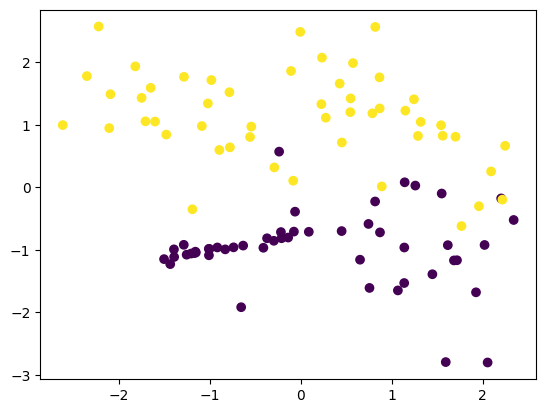

In [2]:
import sklearn
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wandb
import os

# Initialize Weights & Biases
wandb.init(project="synth-data-youtube")

X, y = make_classification(n_features=2, n_redundant=0, n_classes=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

# Save the Matplotlib figure as an image
plt.savefig("scatter_plot.png")

# Log the image to Weights & Biases
wandb.log({"chart": wandb.Image("scatter_plot.png")})

clf = svm.SVC(probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_probas = clf.predict_proba(X_test)

wandb.sklearn.plot_classifier(clf, X_train, X_test, y_train, y_test, y_pred=y_pred, y_probas=y_probas, labels=['1', '2'], model_name='SVC', feature_names=None)


In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

In [5]:
print(y_pred)

[1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0]


In [6]:
print(y_probas)

[[0.30444487 0.69555513]
 [0.05735866 0.94264134]
 [0.02173247 0.97826753]
 [0.93334523 0.06665477]
 [0.03948443 0.96051557]
 [0.03121567 0.96878433]
 [0.02720021 0.97279979]
 [0.04410898 0.95589102]
 [0.02649768 0.97350232]
 [0.02691552 0.97308448]
 [0.025475   0.974525  ]
 [0.07470356 0.92529644]
 [0.95361168 0.04638832]
 [0.94451695 0.05548305]
 [0.02813061 0.97186939]
 [0.93810398 0.06189602]
 [0.77960107 0.22039893]
 [0.02786331 0.97213669]
 [0.23315782 0.76684218]
 [0.93317372 0.06682628]]


4422102/4422102 [==============================] - 0s 0us/step


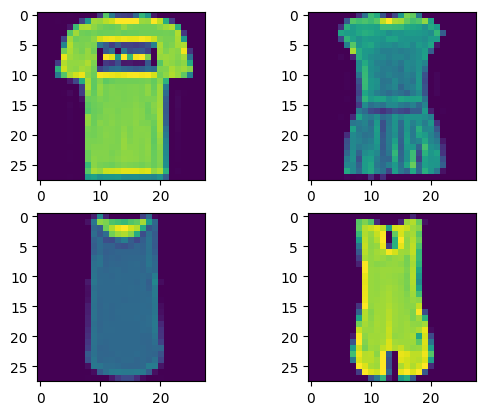

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

example = np.rot90(x_train[0])
x_train = x_train[:,np.newaxis,:,:]
x_test = x_test[:,np.newaxis,:,:]
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

fig, axs = plt.subplots(2, 2)
axs[0, 0].imshow(np.squeeze(x_train[1,:,:]))
axs[1, 0].imshow(np.squeeze(x_train[2,:,:]))
axs[0, 1].imshow(np.squeeze(x_train[3,:,:]))
axs[1, 1].imshow(np.squeeze(x_train[4,:,:]))
plt.show()

wandb.log({"example_ims": fig})

In [9]:
model = Sequential()
model.add(Conv2D(input_shape=(1,28, 28),filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Conv2D(filters=4, kernel_size=4, strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

opt = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001)

model.compile(opt, loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, callbacks=[WandbCallback()])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 1, 14, 4)          1796      
                                                                 
 conv2d_3 (Conv2D)           (None, 1, 7, 4)           260       
                                                                 
 flatten_1 (Flatten)         (None, 28)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                290       
                                                                 
Total params: 2346 (9.16 KB)
Trainable params: 2346 (9.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 6.6856 - acc: 0.4105

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 6.6834 - acc: 0.4105 - val_loss: 2.2519 - val_acc: 0.5545
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 1.4231 - acc: 0.6274

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 1.4231 - acc: 0.6274 - val_loss: 1.0153 - val_acc: 0.6721
Epoch 3/10
1868/1875 [============================>.] - ETA: 0s - loss: 0.8610 - acc: 0.7086

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 0.8605 - acc: 0.7088 - val_loss: 0.7936 - val_acc: 0.7247
Epoch 4/10
1865/1875 [============================>.] - ETA: 0s - loss: 0.7337 - acc: 0.7461

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 0.7332 - acc: 0.7462 - val_loss: 0.7276 - val_acc: 0.7450
Epoch 5/10
1862/1875 [============================>.] - ETA: 0s - loss: 0.6830 - acc: 0.7647

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6830 - acc: 0.7646 - val_loss: 0.7127 - val_acc: 0.7507
Epoch 6/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.6548 - acc: 0.7747

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6548 - acc: 0.7746 - val_loss: 0.6689 - val_acc: 0.7690
Epoch 7/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6349 - acc: 0.7819

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6354 - acc: 0.7818 - val_loss: 0.6599 - val_acc: 0.7713
Epoch 8/10
1871/1875 [============================>.] - ETA: 0s - loss: 0.6209 - acc: 0.7859

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 10s 5ms/step - loss: 0.6211 - acc: 0.7859 - val_loss: 0.6435 - val_acc: 0.7806
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.6105 - acc: 0.7905

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 9s 5ms/step - loss: 0.6105 - acc: 0.7905 - val_loss: 0.6387 - val_acc: 0.7805
Epoch 10/10
1867/1875 [============================>.] - ETA: 0s - loss: 0.6023 - acc: 0.7943

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
wandb: Adding directory to artifact (/content/wandb/run-20231109_140748-c8hw0awx/files/model-best)... Done. 0.0s


1875/1875 [==============================] - 8s 4ms/step - loss: 0.6019 - acc: 0.7945 - val_loss: 0.6293 - val_acc: 0.7864


1/1 [==============================] - 0s 101ms/step
6


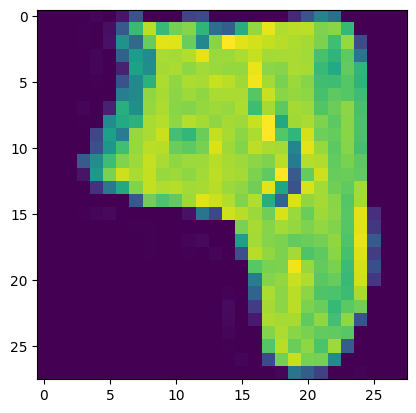

In [10]:
print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))
plt.figure()
plt.imshow(np.squeeze(example))

wandb.log({"example_rot": fig})


In [11]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=180, data_format="channels_first")
datagen.fit(x_train)

model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test), callbacks=[WandbCallback()])

print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))



Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 2.2527 - acc: 0.2417 - val_loss: 1.7265 - val_acc: 0.3903
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 1.8678 - acc: 0.3119 - val_loss: 1.7031 - val_acc: 0.3628
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 1.7622 - acc: 0.3556 - val_loss: 1.7018 - val_acc: 0.3418
Epoch 4/10
1875/1875 [==============================] - 26s 14ms/step - loss: 1.6920 - acc: 0.3849 - val_loss: 1.7194 - val_acc: 0.3489
Epoch 5/10
1875/1875 [==============================] - 25s 14ms/step - loss: 1.6421 - acc: 0.4064 - val_loss: 1.6674 - val_acc: 0.3838
Epoch 6/10
1875/1875 [==============================] - 26s 14ms/step - loss: 1.6008 - acc: 0.4205 - val_loss: 1.6077 - val_acc: 0.4123
Epoch 7/10
1875/1875 [==============================] - 26s 14ms/step - loss: 1.5761 - acc: 0.4362 - val_loss: 1.5900 - val_acc: 0.4258
Epoch 8/10
1875/1875 [==========================

In [12]:
print(np.argmax(model.predict(example[np.newaxis,np.newaxis, :,:])))

1/1 [==============================] - 0s 23ms/step
9
